In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.stats import shapiro
import os

In [2]:
#read the data
data_path1 = os.path.join(os.getcwd(), "d4frac_returns.csv")
data_path2 = os.path.join(os.getcwd(), "d5frac_returns.csv")
data_path3 = os.path.join(os.getcwd(), "weights4.csv")
data_path4 = os.path.join(os.getcwd(), "weights5.csv")

In [3]:
d4frac = pd.read_csv(data_path1, header = None)
d5frac = pd.read_csv(data_path2, header = None)
weights_4 = pd.read_csv(data_path3, header = None)
weights_5 = pd.read_csv(data_path4, header = None)

In [4]:
weights_4 = weights_4[0].values.tolist()
weights_5 = weights_5[0].values.tolist()

In [5]:
d5frac

,0
0,-0.0137
1,0.0244
2,0.0000
3,-0.0115
4,-0.0033
...,...
8766,0.0000
8767,0.0008
8768,-0.0071
8769,0.0356


## Data Exploration

### Number of Transactions

In [6]:
print(len(d4frac))
print(len(d5frac))

19263
8771


### Distribution of Returns

In [7]:
#Filtering positive and negative returns

positive_ret_4 = list(filter(lambda x: x >= 0, d4frac[0]))
negative_ret_4 = list(filter(lambda x: x < 0, d4frac[0]))
positive_ret_5 = list(filter(lambda x: x >= 0, d5frac[0]))
negative_ret_5 = list(filter(lambda x: x < 0, d5frac[0]))

#Distribution

print(f"Number of positive returns (Day 4): {len(positive_ret_4)}")
print(f"Number of negative returns (Day 4): {len(negative_ret_4)}")
print(f"Number of positive returns (Day 5): {len(positive_ret_5)}")
print(f"Number of negative returns (Day 5): {len(negative_ret_5)}")

Number of positive returns (Day 4): 10800
Number of negative returns (Day 4): 8463
Number of positive returns (Day 5): 4661
Number of negative returns (Day 5): 4110


### Average Return

In [8]:
print("Day 4 Stats:")
print(f"mean: {float(d4frac.mean())}")
print(f"std: {float(d4frac.std())}")
print("")

print("Day 5 Stats:")
print(f"mean: {float(d5frac.mean())}")
print(f"std: {float(d5frac.std())}")

Day 4 Stats:
mean: 0.0011958365778954475
std: 0.02389786311346583

Day 5 Stats:
mean: 0.00035286740394481806
std: 0.02104708463002845


### Average Gain and Average Loss

In [9]:
def Average(lst): 
    return sum(lst) / len(lst) 

avg_gain_4 = Average(positive_ret_4)
avg_loss_4 = Average(negative_ret_4)
avg_gain_5 = Average(positive_ret_5)
avg_loss_5 = Average(negative_ret_5)

print(f"Average Gain (Day 4): {avg_gain_4}")
print(f"Average Loss (Day 4): {avg_loss_4}")
print(f"Average Gain (Day 5): {avg_gain_5}")
print(f"Average Loss (Day 5): {avg_loss_5}")

Average Gain (Day 4): 0.01410849074074078
Average Loss (Day 4): -0.015282559376107846
Average Gain (Day 5): 0.013976464278051918
Average Loss (Day 5): -0.01509715328467149


## Probability of Gain and Loss

In [10]:
prob_gain_4 = len(positive_ret_4)/len(d4frac)
prob_loss_4 = len(negative_ret_4)/len(d4frac)

prob_gain_5 = len(positive_ret_5)/len(d5frac)
prob_loss_5 = len(negative_ret_5)/len(d5frac)

print(f"Probability of Gain (a stock being traded on day 4): {prob_gain_4}")
print(f"Probability of Gain (a stock being traded on day 5): {prob_gain_5}")
print(f"Probability of Loss (a stock being traded on day 4): {prob_loss_4}")
print(f"Probability of Loss (a stock being traded on day 5): {prob_loss_5}")

Probability of Gain (a stock being traded on day 4): 0.5606603332814203
Probability of Gain (a stock being traded on day 5): 0.5314103294949265
Probability of Loss (a stock being traded on day 4): 0.43933966671857966
Probability of Loss (a stock being traded on day 5): 0.46858967050507355


## Visualization

### (A) Average 

Considering all stocks that can be traded on days 4 and 5, respectively

### Histograms

In [11]:
max_d4 = float(d4frac.max())
min_d4 = float(d4frac.min())
max_d5 = float(d5frac.max())
min_d5 = float(d5frac.min())
n = d4frac.count()
n2 = d5frac.count() 

bins_d4 = (max_d4 - min_d4)/math.sqrt(n)

bins_d5 = (max_d5 - min_d5)/math.sqrt(n2)

In [12]:
bin_num_d4 = np.arange(min_d4, max_d4  + bins_d4, bins_d4)

bin_num_d5 = np.arange(min_d5, max_d5  + bins_d5, bins_d5)

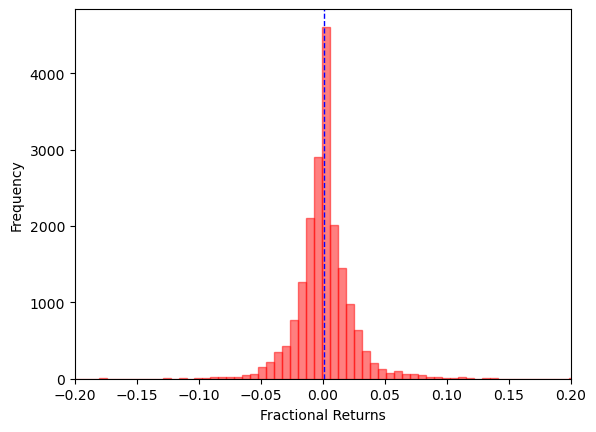

Day 4 Stats:
mean: 0.0011958365778954475
std: 0.02389786311346583


In [17]:
# Creating the histogram using d4frac data
bin_num_d4 = np.arange(min_d4, max_d4  + bins_d4, bins_d4)
plt.hist(d4frac, bins=bin_num_d4, density=False, alpha=0.5, color='r', edgecolor='red')

# Adding labels and title
plt.xlabel('Fractional Returns')
plt.ylabel('Frequency')
# plt.title('Histogram of Fractional Returns (Day 4)')

# Calculate the mean
avg_d4 = d4frac.mean()

# Highlight the mean
plt.axvline(avg_d4.item(), color='blue', linestyle='dashed', linewidth=1)

# Setting the x-axis limits
plt.xlim(-0.2, 0.2)

plt.show()

#density: bool, default: False
#If True, draw and return a probability density: each bin will display the bin's raw count divided 
#by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), 
#so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

print("Day 4 Stats:")
print(f"mean: {float(d4frac.mean())}")
print(f"std: {float(d4frac.std())}")

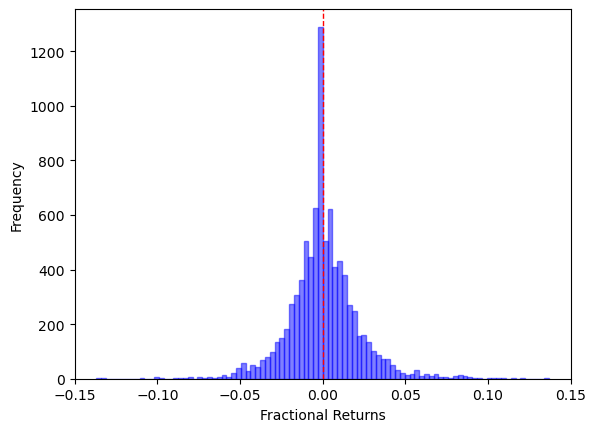

Day 5 Stats:
mean: 0.00035286740394481806
std: 0.02104708463002845


In [20]:
# Creating the histogram using d5frac1 data
bin_num_d5 = np.arange(min_d5, max_d5  + bins_d5, bins_d5)
plt.hist(d5frac, bins=bin_num_d5, density=False, alpha=0.5, color='b', edgecolor='blue')

# Adding labels and title
plt.xlabel('Fractional Returns')
plt.ylabel('Frequency')
# plt.title('Histogram of Fractional Returns (Day 5)')

# Calculate the mean
avg_d5 = d5frac.mean()

# Highlight the mean
plt.axvline(avg_d5.item(), color='red', linestyle='dashed', linewidth=1)


# Setting the x-axis limits
plt.xlim(-0.15, 0.15)

plt.show()

print("Day 5 Stats:")
print(f"mean: {float(d5frac.mean())}")
print(f"std: {float(d5frac.std())}")

## (B) Average of the Averages

Getting the average of the average fractional returns of stock i traded on day j, i = 1:10 and j = 4,5

##### Mean Fractional Returns per Meaningful Word

##### Helper Functions

In [15]:
# Function that outputs normalized histogram of Day-4 and Day-5 returns of individual sequences
def histogram_norm(csv_path1, csv_path2):
    data_path1 = os.path.join(os.getcwd(), csv_path1)
    data_path2 = os.path.join(os.getcwd(), csv_path2)
    df1 = pd.read_csv(data_path1, header = None)
    df2 = pd.read_csv(data_path2, header = None)
    
    df1_max = float(df1.max())
    df1_min = float(df1.min())
    df2_max = float(df2.max())
    df2_min = float(df2.min())
    
    n1 = df1.count()
    n2 = df2.count() 
    
    df1_bins = (df1_max - df1_min)/math.sqrt(n1)
    df2_bins = (df2_max - df2_min)/math.sqrt(n2)
    
    df1_binwidth = round(df1_bins,2)
    df2_binwidth = round(df2_bins,2)
    
    df1_xbins = np.arange(df1_min, df1_max + df1_binwidth, df1_binwidth)
    df2_xbins = np.arange(df2_min, df2_max + df2_binwidth, df2_binwidth)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 10), tight_layout=True)
    axes[0].hist(df1, bins=df1_xbins, density=True, alpha=0.5, color='r', edgecolor='red')
    axes[0].set_xlabel('Fractional Returns')
    axes[0].set_ylabel('Probability Density')
    axes[0].set_title('Normalized Histogram of Day-4 Returns')
    
    axes[1].hist(df2, bins=df2_xbins, density=True, alpha=0.5, color='forestgreen', edgecolor='darkgreen')
    axes[1].set_xlabel('Fractional Returns')
    axes[1].set_ylabel('Probability Density')
    axes[1].set_title('Normalized Histogram of Day-5 Returns')
    
    data = {
    "Fractional Return": ["Day 4", "Day 5"],
    "Average Return": [float(df1.mean()),float(df2.mean())],
    "Standard Deviation": [float(df1.std()),float(df2.std())]
    }

    df = pd.DataFrame(data)
    
    return df

In [16]:
# Function that outputs (frequency) histogram of weekly Day-4 and Day-5 returns of sequences
def histogram_weekly(csv_path1, csv_path2):
    data_path1 = os.path.join(os.getcwd(), csv_path1)
    data_path2 = os.path.join(os.getcwd(), csv_path2)
    df1 = pd.read_csv(data_path1, header = None)
    df2 = pd.read_csv(data_path2, header = None)
    
    df1_max = float(df1.max())
    df1_min = float(df1.min())
    df2_max = float(df2.max())
    df2_min = float(df2.min())
    
    n1 = df1.count()
    n2 = df2.count() 
    
    df1_bins = (df1_max - df1_min)/math.sqrt(n1)
    df2_bins = (df2_max - df2_min)/math.sqrt(n2)
    
    df1_binwidth = df1_bins
    df2_binwidth = df2_bins
    
    df1_xbins = np.arange(df1_min, df1_max + df1_binwidth, df1_binwidth)
    df2_xbins = np.arange(df2_min, df2_max + df2_binwidth, df2_binwidth)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10,10), tight_layout=True)
    axes[0].hist(df1, bins=df1_xbins, density=False, alpha=0.5, color='r', edgecolor='red')
    axes[0].set_xlabel('Fractional Returns')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram of Day-4 Average Fractional Returns')
    
    axes[1].hist(df2, bins=df2_xbins, density=False, alpha=0.5, color='b', edgecolor='b')
    axes[1].set_xlabel('Fractional Returns')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Histogram of Day-5 Average Fractional Returns')
    
    data = {
    "Fractional Return": ["Day 4", "Day 5"],
    "Weighted Average of the Average Returns": [d4_average_weighted_mean_freturn,d5_average_weighted_mean_freturn],
    "Standard Deviation": [float(df1.std()),float(df2.std())]
    }

    df = pd.DataFrame(data)
    
    return df

In [17]:
# Create a list of the csv files. Use separately for day 4 and day 5.

"""
Note: Make separate folders for csv files of day-4 and day-5 fractional returns.
Make a copy of the csv files of fractional returns and paste them in their respective folders. 
Here, D4_FReturns is the name of the folder containing all csv files for day-4 fractional returns
"""

d4_csv_files = sorted([f for f in os.listdir(os.path.join(os.getcwd(), 'D4_FReturns')) if f.endswith('.csv')], key=lambda x: int(x[6:-4]))
d5_csv_files = sorted([f for f in os.listdir(os.path.join(os.getcwd(), 'D5_FReturns')) if f.endswith('.csv')], key=lambda x: int(x[6:-4]))


# print(csv_files) to check content of the list

In [18]:
# Function that outputs the mean fractional return where input is a csv file
def mean_freturns(csv_path):
    data_path = os.path.join(os.getcwd(), csv_path)
    df = pd.read_csv(data_path, header = None)
    mean_freturn = df.mean()
    return mean_freturn

In [19]:
# Compiles all the day-4 mean returns per meaningful word 

d4_mean_freturns = []

for csv in d4_csv_files: # d4_csv_files is the list of csv files of day-4 fractional returns
    mean_freturn = float(mean_freturns(csv).iloc[0])
    d4_mean_freturns.append(mean_freturn)

# print(d4_mean_freturns, len(d4_mean_freturns)) to check values

for mean_freturn in d4_mean_freturns:
    print(mean_freturn)

EmptyDataError: No columns to parse from file

In [ ]:
d4_mean_freturns

In [ ]:
# Compiles all the day-5 mean returns per meaningful word 

d5_mean_freturns = []

for csv in d5_csv_files: # d5_csv_files is the list of csv files of day-5 fractional returns
    mean_freturn = float(mean_freturns(csv).iloc[0])
    d5_mean_freturns.append(mean_freturn)

# print(d5_mean_freturns, len(d5_mean_freturns)) to check values

for mean_freturn in d5_mean_freturns:
    print(mean_freturn)

In [ ]:
len(d4_mean_freturns)

In [ ]:
# Get the weighted average of the average returns 

d4_average_weighted_mean_freturn =  sum(ret * weight for ret, weight in zip(d4_mean_freturns, weights_4))
d5_average_weighted_mean_freturn =  sum(ret * weight for ret, weight in zip(d5_mean_freturns, weights_5))

print(f"D4 Weighted Average of Averages: {round(d4_average_weighted_mean_freturn,8)}")
print(f"D5 Weighted Average of Averages: {round(d5_average_weighted_mean_freturn,8)}")

In [ ]:
# Save lists as csv

d4_mean_freturns = [float(val) for val in d4_mean_freturns]
d4_mean_freturns_arr = np.array(d4_mean_freturns)

d5_mean_freturns = [float(val) for val in d5_mean_freturns]
d5_mean_freturns_arr = np.array(d5_mean_freturns)
np.savetxt("d4_mean_freturns.csv",d4_mean_freturns_arr,delimiter=",")
np.savetxt("d5_mean_freturns.csv",d5_mean_freturns_arr,delimiter=",")

## Data Exploration

### Distribution

In [ ]:
positive_meanret_d4 = list(filter(lambda x: x >= 0, d4_mean_freturns))
negative_meanret_d4 = list(filter(lambda x: x < 0, d4_mean_freturns))

positive_meanret_d5 = list(filter(lambda x: x >= 0, d5_mean_freturns))
negative_meanret_d5 = list(filter(lambda x: x < 0, d5_mean_freturns))

#Distribution

print(f"Number of positive returns (Day 4): {len(positive_meanret_d4)}")
print(f"Number of negative returns (Day 4): {len(negative_meanret_d4)}")
print(f"Number of positive returns (Day 5): {len(positive_meanret_d5)}")
print(f"Number of negative returns (Day 5): {len(negative_meanret_d5)}")

### Average Gain and Average Loss

In [ ]:
def Average(lst): 
    return sum(lst) / len(lst) 

avg_mgain_4 = Average(positive_meanret_d4)
avg_mloss_4 = Average(negative_meanret_d4)
avg_mgain_5 = Average(positive_meanret_d5)
avg_mloss_5 = Average(negative_meanret_d5)

print(f"Average Gain (Day 4): {avg_mgain_4}")
print(f"Average Loss (Day 4): {avg_mloss_4}")
print(f"Average Gain (Day 5): {avg_mgain_5}")
print(f"Average Loss (Day 5): {avg_mloss_5}")

## Probability of Gain and Loss

In [ ]:
prob_mgain_4 = len(positive_meanret_d4)/len(d4_mean_freturns)
prob_mloss_4 = len(negative_meanret_d4)/len(d4_mean_freturns)

prob_mgain_5 = len(positive_meanret_d5)/len(d5_mean_freturns)
prob_mloss_5 = len(positive_meanret_d5)/len(d5_mean_freturns)

print(f"Probability of Gain (a stock being traded on day 4): {prob_mgain_4}")
print(f"Probability of Gain (a stock being traded on day 5): {prob_mloss_4}")
print(f"Probability of Loss (a stock being traded on day 4): {prob_mgain_5}")
print(f"Probability of Loss (a stock being traded on day 5): {prob_mloss_5}")

In [ ]:
histogram_weekly('d4_mean_freturns.csv','d5_mean_freturns.csv')